# Co-enrichment plots of genes at the single-cell level

In [1]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd
import anndata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from IPython.display import display_html

/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## Load SAM object of homeostatic neural atlas

In [2]:
from samalg import SAM
sam = SAM()
# total combo atlas
sam.load_data('data/brain_combined_samobj.h5ad')
genes = sam.adata.var_names

## Define sets of genes you're interested in
If you want something not in the paper, define a list of both the contig-Id's and names that should be displayed.  Then substitue the appropriate list names where told to below

In [4]:
pc2='dd_Smed_v4_1566_0_1'
smedwi_1 = 'dd_Smed_v4_659_0_1'
trpa='dd_Smed_v4_14207_0_1'

trans_fact = [
    'dd_Smed_v4_17498_0_1',
    'dd_Smed_v4_13056_0_1',
    'dd_Smed_v4_25321_0_1',
    'dd_Smed_v4_13898_0_1',
    'dd_Smed_v4_12021_0_1',
    'dd_Smed_v4_50245_0_1',
    'dd_Smed_v4_8606_0_1',
    'dd_Smed_v4_12068_0_1',
    'dd_Smed_v4_13843_0_1',
    'dd_Smed_v4_14633_0_1',
    'dd_Smed_v4_19326_0_1',
    'dd_Smed_v4_33456_0_1',
             ]           
trans_fact_names = ['mblk','tcf1','soxb2','nkx2.1','gtf2h5','foxq2','pknox','pou6f1','cut-like','otxA','otp','nkx2.4']


transmitter =['dd_Smed_v4_1566_0_1','dd_Smed_v4_18607_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_1106_0_1',
    'dd_Smed_v4_11206_0_1',
    'dd_Smed_v4_8169_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_896_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
             ]
transmitter_names = ['pc2','seratonin','gad','tbh','eaat-1','eaat-2','gat','vGlut','gs','chat','th',]

transmitterShort =['dd_Smed_v4_1566_0_1','dd_Smed_v4_18607_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
             ]
transmitterShort_names = ['pc2','seratonin','gad','tbh','vGlut','chat','th',]


receptor = ['dd_Smed_v4_16476_0_1',
    'dd_Smed_v4_14655_0_1',
    'dd_Smed_v4_25116_0_1',
    'dd_Smed_v4_20665_0_1',
    'dd_Smed_v4_43637_0_1',
    'dd_Smed_v4_41696_0_1',
    'dd_Smed_v4_21924_0_1',
    'dd_Smed_v4_44801_0_1'
           ]
receptor_names = ['gluR1','gluR2','gabrA','gabrB','oar','oamb','dopamine/oar','adrenergic receptor']

neuropep = ['dd_Smed_v4_5133_0_1',
    'dd_Smed_v4_798_0_1',
    'dd_Smed_v4_4046_0_1',
    'dd_Smed_v4_889_0_1',
    'dd_Smed_v4_4624_0_1',
    'dd_Smed_v4_8966_0_1',
    'dd_Smed_v4_13874_0_1',
    'dd_Smed_v4_1902_0_1',
    'dd_Smed_v4_2748_0_1',
    'dd_Smed_v4_2575_0_1',
    'dd_Smed_v4_1015_0_1',
    'dd_Smed_v4_2270_0_1',
    'dd_Smed_v4_4417_0_1',
    'dd_Smed_v4_6856_0_1',
    'dd_Smed_v4_1117_0_1',
    'dd_Smed_v4_1483_0_1',
    'dd_Smed_v4_8852_0_1',
    'dd_Smed_v4_10191_0_1',
    'dd_Smed_v4_2370_0_1',
    'dd_Smed_v4_6375_0_1',
    'dd_Smed_v4_7141_0_1',
    'dd_Smed_v4_13221_0_1',
    'dd_Smed_v4_77250_0_1',
    'dd_Smed_v4_2412_0_1',
    'dd_Smed_v4_13645_0_1',
    'dd_Smed_v4_16946_0_1',
    'dd_Smed_v4_14095_0_1',
    'dd_Smed_v4_3211_0_1',
    'dd_Smed_v4_1520_0_1',
    'dd_Smed_v4_541_0_1',
    'dd_Smed_v4_10098_0_2',
    'dd_Smed_v4_788_0_1 ',
    'dd_Smed_v4_4051_0_1',
    'dd_Smed_v4_3845_0_1',
    'dd_Smed_v4_9341_0_1',
    'dd_Smed_v4_1724_0_1',
    'dd_Smed_v4_1538_0_1',
    'dd_Smed_v4_6003_0_1',
    'dd_Smed_v4_1545_0_1',
    'dd_Smed_v4_584_0_1 ',
    'dd_Smed_v4_1588_0_1',
           ]
neuropep_names = neuropep.copy()

synapt = ['dd_Smed_v4_4222_0_1',
         'dd_Smed_v4_6730_0_1',
         'dd_Smed_v4_7243_0_1',
         'dd_Smed_v4_6920_0_1',
         'dd_Smed_v4_13680_0_1']
synapt_names = ['syt1',
               'syt1b',
               'syt4',
               'syt1a',
               'syt1p']

neo_tf= ['_14661_0_1',
    '_14633_0_1',
    '_75162_0_1',
    '_15144_0_1',
    '_20755_0_1',
    '_13898_0_1',
    '_11198_0_1',
    '_94635_0_1',
    '_15516_0_1',
    '_17726_0_1',
    '_35892_0_1',
    '_13772_0_1',
    '_25321_0_1',
    '_13056_0_1',
    '_6778_0_1',
    '_15178_0_1',
    '_50245_0_1',
    '_9906_0_1',
    '_95726_0_1',
    '_15253_0_1',
    '_11521_0_1',
    '_17498_0_1',
    '_13215_0_1',
    '_8340_0_1',
    '_15331_0_1',
    '_8606_0_1',
    '_12068_0_1',
    '_21801_']

neo_tf_names=['elf-1',
    'otxa',
    'glass',
    'lhx2/9',
    'lhx3/4',
    'nkx2.1',
    'nkx6',
    'nr-1',
    'otxb',
    'pax6a',
    'pax6b',
    'prox-1',
    'soxb-2',
    'tcf1',
    'castor',
    'six3',
    'foxq2',
    'neuroD-1',
    'klf',
    'pitx',
    'lhx1/5',
    'mblk',
    'soxb',
    'fgfr3',
    'zic2',
    'pknox',
    'pou6',
    'arx (pax3/7)'
             ]

neo_tf_2 = [
    'dd_Smed_v4_17731_0_1',
    'dd_Smed_v4_22479_0_1',
    'dd_Smed_v4_9893_0_1',
    'dd_Smed_v4_17951_0_1',
    'dd_Smed_v4_12722_0_1',
    'dd_Smed_v4_9171_0_1',
    'dd_Smed_v4_17534_0_1',
    'dd_Smed_v4_12677_0_1',
    'dd_Smed_v4_5579_0_1',
    'dd_Smed_v4_4415_0_1',
    'dd_Smed_v4_7938_0_1',
    'dd_Smed_v4_3410_0_1',
    'dd_Smed_v4_12634_0_1',
    'dd_Smed_v4_10792_0_1',
    'dd_Smed_v4_26877_0_1',
    'dd_Smed_v4_7316_0_1',
    'dd_Smed_v4_7738_0_1',
    'dd_Smed_v4_9226_0_1',
    'dd_Smed_v4_3641_0_1',
    'dd_Smed_v4_4871_0_1',
    'dd_Smed_v4_8611_0_1',
    'dd_Smed_v4_9899_0_1',
    'dd_Smed_v4_4048_0_1',
    'dd_Smed_v4_3140_0_1',
    'dd_Smed_v4_7227_0_1',
    'dd_Smed_v4_31217_0_1',
    'dd_Smed_v4_8234_0_1',
    #'dd_Smed_v4_6778_0_1',
    'dd_Smed_v4_16222_0_1',
    'dd_Smed_v4_47123_0_1',
    'dd_Smed_v4_48430_0_1',
    'dd_Smed_v4_16375_0_1',
]
neo_tf_2_names = [
    'sim',
    'hesl-3',
    'coe',
    'twist',
    'e22/23 (olig1)',
    'arnt',
    'arh (ahr?)',
    'atoh8-1',
    'da',
    'mxi-1',
    'mitfl-1',
    'max',
    'myo-D',
    'ap4-1',
    'atoh',
    'mitfl-2',
    'mitfl-3',
    'mlxipl',
    'srebp',
    'usf',
    'ap4-2',
    'atoh8-2',
    'mxi-2',
    'mlx',
    'soxp-1',
    'hlh-1',
    'pou2/3',
    #'castor',
    'runt',
    'arrowhead',
    'ovo',
    'meis',

]

neo_tf.extend(neo_tf_2)
neo_tf_names.extend(neo_tf_2_names)


NTnew =['dd_Smed_v4_1566_0_1','dd_Smed_v4_12700_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
    'dd_Smed_v4_5713_0_1',
             ]
NTnew_names = ['peptidergic','serotonergic','gabaergic','octopaminergic','glutaminergic','cholinergic','dopaminergic', 'glycinergic']

# Remove low-expressing genes from transcription factr lists to improve clustering for paper
pop_list = ['ovo','atoh','twist','glass','klf','nr-1','pax6b','soxb-2','meis','runt','hesl-3','myo-D','soxp-1','fgfr3']
pop_list = ['myo-D','soxp-1','fgfr3','runt',]
for g in pop_list:
    ind = neo_tf_names.index(g)
    print(ind)
    neo_tf_names.pop(ind)
    neo_tf.pop(ind)

40
51
23
52


# Analyze it

## Extract Positive Cells
* If want to consider enrichment in only a subset of cells of the atlas (e.g. smedwi+ cells), define genes you want to include in pos_target.

* If want all cells, include the empty string '' in pos_target

* Will extract all cells that are positive for at least one of the genes in pos_target

* Can use the function extract_neg_cells to get all cells that DO NOT express ANY of the genes in pos_target

In [5]:
def target_to_ind(target,data,genes):
    if type(target) is str:
        target=[target]
    target_ind = np.zeros(len(target))
    for i, contig in enumerate(genes):
        for j, targ in enumerate(target):
            if targ in contig:
                target_ind[j] = i
    return target_ind.astype(int)

def extract_pos_cells(target,data,genes, ind=False):
    if '' in target:
        ind_pos = np.arange(data.shape[0])
    else:
        target_ind = target_to_ind(target,data,genes)
        pos_cells = data[:,target_ind].sum(axis=1)
        ind_pos = np.where(pos_cells>0)[0]
    print(f'{ind_pos.size}/{data.shape[0]}')
    if ind:
        return ind_pos
    else:
        return data[ind_pos]
    
def extract_neg_cells(target,data,genes, ind=False):
    if '' in target:
        ind_pos = np.arange(data.shape[0])
    else:
        target_ind = target_to_ind(target,data,genes)
        pos_cells = data[:,target_ind].sum(axis=1)
        ind_pos = np.where(pos_cells==0)[0]
    print(f'{ind_pos.size}/{data.shape[0]}')
    if ind:
        return ind_pos
    else:
        return data[ind_pos]

#Define what subset of cells to consider
pos_target=[]
pos_target_names=[]
# pos_target.extend([''])
# pos_target_names.extend(['all'])
# pos_target.extend(synapt)
# pos_target_names.extend(synapt_names)
# pos_target.extend(['dd_Smed_v4_659_0_1'])
# pos_target_names.extend(['pc2'])
# pos_target.extend(trans_fact)
# pos_target.extend(NTnew)
pos_target.extend(neo_tf)

#extract cells
combined_pos = extract_pos_cells(pos_target,sam.adata_raw.X,genes)


17353/19673


# Make bar plot
## Define the genes you want to look at by subset_gene and subset_gene_names
## Heatmap Enrichment ~ P(B+ | A+ )

In [7]:
subset_A_gene = []
subset_A_gene_names = []
# subset_A_gene.extend(receptor)
# subset_A_gene_names.extend(receptor_names)
# subset_A_gene.extend(trans_fact)
# subset_A_gene_names.extend(trans_fact_names)
# subset_A_gene.extend(transmitterShort)
# subset_A_gene_names.extend(transmitterShort_names)
# subset_A_gene.extend(neuropep)
# subset_A_gene_names.extend(neuropep_names)
# subset_A_gene.extend(synapt)
# subset_A_gene_names.extend(synapt_names)
# subset_A_gene.extend(synapt)
# subset_A_gene_names.extend(synapt_names)
# subset_A_gene.append('_659_')
# subset_A_gene_names.append('smedwi-1')
subset_A_gene.extend(neo_tf)
subset_A_gene_names.extend(neo_tf_names)
# subset_A_gene.extend(NTnew)
# subset_A_gene_names.extend(NTnew_names)

subset_B_gene = []
subset_B_gene_names = []
subset_B_gene = subset_A_gene.copy()             #<--Use this to emulate the old version
subset_B_gene_names = subset_A_gene_names.copy()
# subset_B_gene.extend(trans_fact)
# subset_B_gene_names.extend(trans_fact_names)
# subset_B_gene.extend(transmitterShort)
# subset_B_gene_names.extend(transmitterShort_names)
# subset_B_gene.extend(receptor)
# subset_B_gene_names.extend(receptor_names)
# subset_B_gene.extend(neuropep)
# subset_B_gene_names.extend(neuropep_names)
# subset_B_gene.extend(NTnew)
# subset_B_gene_names.extend(NTnew_names)

subset_A_pos = []
for g in subset_A_gene:
    gene_num = target_to_ind(g,None,genes)[0]
    if gene_num==0:
        print(g)
    subset_A_pos.append(np.mean(combined_pos[:,gene_num]>0))
    
subset_B_pos = []
for g in subset_B_gene:
    gene_num = target_to_ind(g,None,genes)[0]
    if gene_num==0:
        print(g)
    subset_B_pos.append(np.mean(combined_pos[:,gene_num]>0))
    

## The math part
 ### Define if you want to see the relative expression HERE
 * if relative expression=True: Show enrichment = P(B+ | A+)/p(B+)
 
 * if relative expression=False: Show coexpression = P(B+ | A+)

In [8]:
relative_expression = True
goi_A_ind = target_to_ind(subset_A_gene,None,genes)
goi_B_ind = target_to_ind(subset_B_gene,None,genes)


#identify which cells are positive for each gene in set A
subset_gene_pos = []
for g in goi_A_ind:
    ind = np.where((combined_pos[:,g]>0).sum(axis=1))[0]
    subset_gene_pos.append(ind)

#pull positivity of B list genes in all cells
pos_goi = combined_pos[:,goi_B_ind]
pos_goi_bi = pos_goi>0
#for each positive set in A, calculate the fraction positive for each gene in B
plot_array = []
for ind in subset_gene_pos:
    plot_array.append(pos_goi_bi[ind,:].mean(axis=0)[0])
plot_array = np.squeeze(np.array(plot_array))
if relative_expression:
    plot_array = plot_array/np.array(subset_B_pos)





## HEATMAP
* By default, will order genes by fraction of cells containing that gene
* To cluster genes, run the following cell. To save and plot with clustered order, rerun this cell with the appropriate lines uncommented


/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log2


-5.0 8.623465859507029


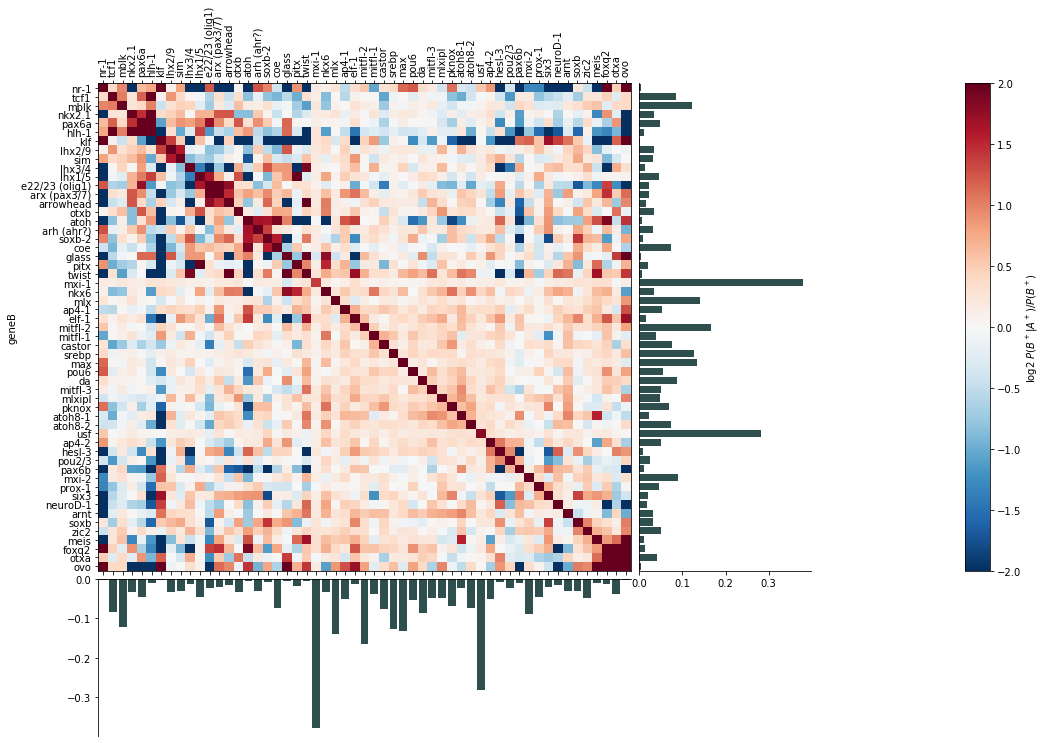

In [11]:
log_scale=True
# ind_B=[]
# for nm in np.unique(subset_B_gene_names):
#     ind = np.where(np.array(subset_B_gene_names)==nm)[0]
#     ind2 = np.argsort(-np.array(subset_B_pos)[ind])
#     ind_B.extend(ind[ind2])
# ind_B=np.array(ind_B)
ind_B = np.argsort(-np.array(subset_B_pos))
ind_A = np.argsort(-np.array(subset_A_pos))
'''uncomment next 2 lines to use clustered ordering'''
# ind_B = index_genes
# ind_A = index_subset

fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(4, 5)
gs.update(wspace=0.05, hspace=0.05)
ax_main = plt.subplot(gs[0:3, :3])
ax_yDist = plt.subplot(gs[0:3, 3], )
ax_xDist = plt.subplot(gs[3, 0:3,], )
ax_cbar = plt.subplot(gs[0:3,4], )
ax = [ax_main,ax_yDist, ax_xDist]
ext=(0,500,0,500)
if relative_expression:
    if log_scale:
        qq=np.log2(plot_array.T[ind_B][:,ind_A])
        qq[~np.isfinite(qq)] = -5
        print(qq.min(),qq.max())
        im = ax[0].matshow(qq,clim=(-2,2),cmap='RdBu_r')
        plt.colorbar(im,label='log2 $P(B^+ | A^+)/P(B^+)$',ax=ax_cbar)
    else:
        qq=np.log2(plot_array.T[ind_B][:,ind_A])
else:
    if log_scale:
        im = ax[0].matshow(np.log2(plot_array.T[ind_B][:,ind_A]),clim=(-6,0),)
        plt.colorbar(im,label='log2 $P(B^+ | A^+)$',)
    else:
        im = ax[0].matshow(plot_array.T[ind_B][:,ind_A],clim=(0,.3),)
        plt.colorbar(im,label='$P(B^+ | A^+)$',)


ax[0].set_yticks(np.arange(len(subset_B_gene_names)),)
ax[0].set_yticklabels(np.array(subset_B_gene_names)[ind_B])
ax[0].set_xticks(np.arange(len(subset_A_gene_names)),)
ax[0].set_xticklabels(np.array(subset_A_gene_names)[ind_A],rotation=90)
ax[0].set_ylabel('geneB')
ax[0].set_aspect('auto')

ax[1].barh(np.arange(len(subset_B_gene)),np.array(subset_B_pos)[ind_B],color='darkslategrey',label='neurons',height=.8)
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

xx=np.linspace(0,1,len(subset_A_gene))*(len(subset_A_gene)+1)
xx = np.arange(len(subset_A_gene))
ax[2].bar(xx,-np.array(subset_A_pos)[ind_A],color='darkslategrey',label='neurons',width=.8)
ax[2].set_xticks([])
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax_cbar.set_xticks([])
ax_cbar.set_yticks([])
for s in ['bottom','left','top','right']:
    ax_cbar.spines[s].set_visible(False)


ax[0].set_ylim(len(subset_B_gene)-.5,-.5)
ax[1].set_ylim(len(subset_B_gene)-.5,-.5)
ax[2].set_xlim(0-.5,len(subset_A_gene)-1+.5)
# ax[1].set_xlim(0,.33)
# ax[2].set_ylim(-.33,0)
plt.rcParams['svg.fonttype']='none'
fig.savefig('PLOTS/heatmap+barplot.svg')

## Clustered version
Run this to calculate clustering order based on correlation vectors

/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  from ipykernel import kernelapp as app
/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log2


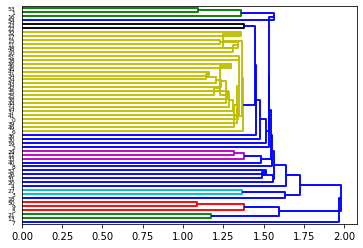

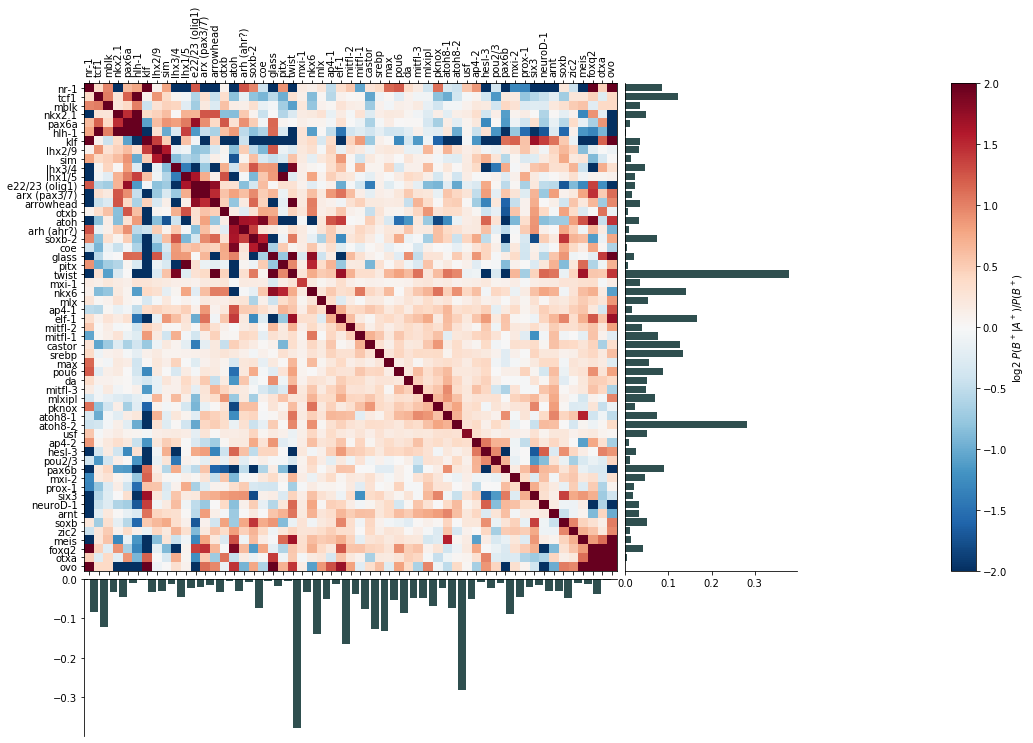

In [10]:
log_scale=False
import scipy
import scipy.cluster.hierarchy as sch
from scipy.stats import pearsonr
def dist(x,y):
    return pearsonr(x,y)[0]#return np.sum(np.abs(x-y)**2)#

#cluster subsets
if relative_expression:
    x = np.log2(plot_array)
    x[~np.isfinite(x)]=-2
#     x=np.clip(x,-2,2)
else:
    x=plot_array.copy()
D = scipy.zeros((x.shape[0],x.shape[0]))
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i,j] = dist(x[i],x[j])
# Compute and plot dendrogram.
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
index_subset = Z['leaves']
#cluster genes (clusters, lol)
x = x.copy().T
D = scipy.zeros((x.shape[0],x.shape[0]))
for i in range(D.shape[0]):
    for j in range(D.shape[1]):
        D[i,j] = dist(x[i],x[j])
# Compute and plot dendrogram.
Y = sch.linkage(D, method='centroid')
Z = sch.dendrogram(Y, orientation='right')
index_genes = Z['leaves']
# plt.close('all')

#PLOT THINGS
fig = plt.figure(figsize=(16,12))
gs = gridspec.GridSpec(4, 5)
gs.update(wspace=0.05, hspace=0.05)
ax_main = plt.subplot(gs[0:3, :3])
ax_yDist = plt.subplot(gs[0:3, 3], )
ax_xDist = plt.subplot(gs[3, 0:3,], )
ax_cbar = plt.subplot(gs[0:3,4], )
ax = [ax_main,ax_yDist, ax_xDist]

ext=(0,500,0,500)
ind_B = index_genes
ind_A = index_subset

if relative_expression:
    qq=np.log2(plot_array.T[ind_B][:,ind_A])
    qq[~np.isfinite(qq)] = -5
    im = ax[0].matshow(qq,clim=(-2,2),cmap='RdBu_r')
    plt.colorbar(im,label='log2 $P(B^+ | A^+)/P(B^+)$',ax=ax_cbar)
else:
    if log_scale:
        im = ax[0].matshow(np.log10(plot_array.T[ind_B][:,ind_A]),clim=(-2,0),)
        plt.colorbar(im,label='log10 $P(B^+ | A^+)$',)
    else:
        im = ax[0].matshow(plot_array.T[ind_B][:,ind_A],clim=(0,1),)
        plt.colorbar(im,label='$P(B^+ | A^+)$',)

ax[0].set_yticks(np.arange(len(subset_B_gene_names)),)
ax[0].set_yticklabels(np.array(subset_B_gene_names)[index_genes])
ax[0].set_xticks(np.arange(len(subset_A_gene_names)),)
ax[0].set_xticklabels(np.array(subset_A_gene_names)[index_subset],rotation=90)

ax[0].set_aspect('auto')

ax[1].barh(np.arange(len(subset_B_gene))-1,np.array(subset_B_pos)[ind_B],color='darkslategrey',label='neurons',height=.8)
# ax[1].barh(np.arange(len(goi))+.2,np.array(brain_subset_pos)[ind],color='mediumturquoise',label='brain enriched',height=.4)
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

xx=np.linspace(0,1,len(subset_A_gene))*(len(subset_A_gene))
xx = np.arange(len(subset_A_gene))-.5
ax[2].bar(xx,-np.array(subset_A_pos)[ind_A],color='darkslategrey',label='neurons',width=.8)
# ax[1].barh(np.arange(len(goi))+.2,np.array(brain_subset_pos)[ind],color='mediumturquoise',label='brain enriched',height=.4)
ax[2].set_xticks([])
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax_cbar.set_xticks([])
ax_cbar.set_yticks([])
for s in ['bottom','left','top','right']:
    ax_cbar.spines[s].set_visible(False)


ax[0].set_ylim(len(subset_B_gene)-.5,-.5)
ax[1].set_ylim(len(subset_B_gene)-.5,-.5)
ax[2].set_xlim(0-.5,len(subset_A_gene)-1+.5)
plt.rcParams['svg.fonttype']='none'